# AMP Salvage Network Model Construction

Based on Chapter 12 of <cite data-cite="Pal11">Systems Biology: Simulation of Dynamic Network States</cite>

To construct a model of the AMP Salvage Network (AMPSN), first we import **MASSpy** and other essential packages. Constants used throughout the notebook are also defined.

In [1]:
from os import path

import matplotlib.pyplot as plt

from cobra import DictList

from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util.qcqa import qcqa_model

mass_config = MassConfiguration()

mass_config.irreversible_Keq = float("inf")

## Model Construction 

The first step of creating a model of the AMPSN is to define the `MassModel`. 

In [2]:
ampsn = MassModel("AMPSalvageNetwork")

### Metabolites

The next step is to define all of the metabolites using the `MassMetabolite` object. Some considerations for this step include the following:

1. It is important to use a clear and consistent format for identifiers and names when defining the `MassMetabolite` objects for various reasons, some of which include improvements to model clarity and utility, assurance of unique identifiers (required to add metabolites to the model), and consistency when collaborating and communicating with others. 

2. In order to ensure our model is physiologically accurate, it is important to provide the `formula` argument with a string representing the chemical formula for each metabolite, and the `charge` argument with an integer representing the metabolite's ionic charge (Note that neutrally charged metabolites are provided with 0). These attributes can always be set later if necessary using the `formula` and `charge` attribute set methods.

3. To indicate that the cytosol is the cellular compartment in which the reactions occur, the string "c" is provided to the `compartment` argument.

This model will be created using identifiers and names found in the [BiGG Database](http://bigg.ucsd.edu/).

In this model, there are 15 metabolites inside the cytosol compartment. 

In [3]:
adn_c = MassMetabolite(
    "adn_c",
    name="Adenosine",
    formula="C10H13N5O4",
    charge=0,
    compartment="c",
    fixed=False)

ade_c = MassMetabolite(
    "ade_c",
    name="Adenine",
    formula="C5H5N5",
    charge=0,
    compartment="c",
    fixed=False)

imp_c = MassMetabolite(
    "imp_c",
    name="Inosine monophosphate",
    formula="C10H11N4O8P",
    charge=-2,
    compartment="c",
    fixed=False)

ins_c = MassMetabolite(
    "ins_c",
    name="Inosine",
    formula="C10H12N4O5",
    charge=0,
    compartment="c",
    fixed=False)

hxan_c = MassMetabolite(
    "hxan_c",
    name="Hypoxanthine",
    formula="C5H4N4O",
    charge=0,
    compartment="c",
    fixed=False)

r1p_c = MassMetabolite(
    "r1p_c",
    name="Alpha-D-Ribose 1-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

r5p_c = MassMetabolite(
    "r5p_c",
    name="Alpha-D-Ribose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

prpp_c = MassMetabolite(
    "prpp_c",
    name="5-Phospho-alpha-D-ribose 1-diphosphate",
    formula="C5H8O14P3",
    charge=-5,
    compartment="c",
    fixed=False)

atp_c = MassMetabolite(
    "atp_c",
    name="ATP",
    formula="C10H12N5O13P3",
    charge=-4,
    compartment="c",
    fixed=False)

adp_c = MassMetabolite(
    "adp_c",
    name="ADP",
    formula="C10H12N5O10P2",
    charge=-3,
    compartment="c",
    fixed=False)

amp_c = MassMetabolite(
    "amp_c",
    name="AMP",
    formula="C10H12N5O7P",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

pi_c = MassMetabolite(
    "pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c",
    fixed=False)

nh3_c = MassMetabolite(
    "nh3_c",
    name="Ammonia",
    formula="H3N",
    charge=0,
    compartment="c",
    fixed=False)

### Reactions

Once all of the `MassMetabolite` objects for each metabolite, the next step is to define all of the reactions that occur and their stoichiometry.

1. As with the metabolites, it is also important to use a clear and consistent format for identifiers and names when defining when defining the `MassReaction` objects.

2. To make this model useful for integration with other models, it is important to provide a string to the `subsystem` argument. By providing the subsystem, the reactions can be easily obtained even when integrated with a significantly larger model through the `subsystem` attribute.

3. After the creation of each `MassReaction` object, the metabolites are added to the reaction using a dictionary where keys are the `MassMetabolite` objects and values are the stoichiometric coefficients (reactants have negative coefficients, products have positive ones). 

This model will be created using identifiers and names found in the [BiGG Database](http://bigg.ucsd.edu/).

In this model, there are 10 reactions occuring inside the cytosol compartment.

In [4]:
ADNK1 = MassReaction(
    "ADNK1",
    name="Adenosine kinase",
    subsystem=ampsn.id, 
    reversible=False)
ADNK1.add_metabolites({
    adn_c: -1,
    atp_c: -1,
    adp_c: 1,
    amp_c: 1,
    h_c: 1})

NTD7 = MassReaction(
    "NTD7",
    name="5'-nucleotidase (AMP)",
    subsystem=ampsn.id, 
    reversible=False)
NTD7.add_metabolites({
    amp_c: -1,
    h2o_c: -1,
    adn_c: 1,
    pi_c: 1})

AMPDA = MassReaction(
    "AMPDA",
    name="Adenosine monophosphate deaminase",
    subsystem=ampsn.id, 
    reversible=False)
AMPDA.add_metabolites({
    amp_c: -1,
    h2o_c: -1,
    imp_c: 1,
    nh3_c: 1})

NTD11 = MassReaction(
    "NTD11",
    name="5'-nucleotidase (IMP)",
    subsystem=ampsn.id, 
    reversible=False)
NTD11.add_metabolites({
    imp_c: -1,
    h2o_c: -1,
    ins_c: 1,
    pi_c: 1})

ADA = MassReaction(
    "ADA",
    name="Adenosine deaminase",
    subsystem=ampsn.id, 
    reversible=False)
ADA.add_metabolites({
    adn_c: -1,
    h2o_c: -1,
    ins_c: 1,
    nh3_c: 1})

PUNP5 = MassReaction(
    "PUNP5",
    name="Purine-nucleoside phosphorylase (Inosine)",
    subsystem=ampsn.id,
    reversible=True)
PUNP5.add_metabolites({
    ins_c: -1,
    pi_c: -1,
    hxan_c: 1,
    r1p_c: 1})

PPM = MassReaction(
    "PPM",
    name="Phosphopentomutase",
    subsystem=ampsn.id,
    reversible=True)
PPM.add_metabolites({
    r1p_c: -1,
    r5p_c: 1})
# Must account for lack of ADK1 reaction in this model. 
# Therefore, coefficients of atp_c and adp_c are -2 and 2
PRPPS = MassReaction(
    "PRPPS",
    name="Phosphoribosylpyrophosphate synthetase",
    subsystem=ampsn.id, 
    reversible=False)
PRPPS.add_metabolites({
    atp_c: -2,
    r5p_c: -1,
    adp_c: 2,
    h_c: 1,
    prpp_c: 1})

ADPT = MassReaction(
    "ADPT",
    subsystem=ampsn.id, 
    reversible=False)
ADPT.add_metabolites({
    ade_c: -1,
    h2o_c: -1,
    prpp_c: -1,
    amp_c: 1,
    h_c: 1,
    pi_c: 2
})

ATPM = MassReaction(
    "ATPM",
    name="ATP maintenance requirement",
    subsystem="Misc.", 
    reversible=False)
ATPM.add_metabolites({
    adp_c: -1,
    h_c: -1,
    pi_c: -1, 
    atp_c: 1,
    h2o_c: 1})

After generating the reactions, all reactions are added to the model through the `MassModel.add_reactions` class method. Adding the `MassReaction` objects will also add their associated `MassMetabolite` objects if they have not already been added to the model. 

In [5]:
ampsn.add_reactions([
    ADNK1, NTD7, AMPDA, NTD11, ADA, PUNP5, PPM, PRPPS, ADPT, ATPM])

for reaction in ampsn.reactions:
    print(reaction)

ADNK1: adn_c + atp_c --> adp_c + amp_c + h_c
NTD7: amp_c + h2o_c --> adn_c + pi_c
AMPDA: amp_c + h2o_c --> imp_c + nh3_c
NTD11: h2o_c + imp_c --> ins_c + pi_c
ADA: adn_c + h2o_c --> ins_c + nh3_c
PUNP5: ins_c + pi_c <=> hxan_c + r1p_c
PPM: r1p_c <=> r5p_c
PRPPS: 2 atp_c + r5p_c --> 2 adp_c + h_c + prpp_c
ADPT: ade_c + h2o_c + prpp_c --> amp_c + h_c + 2 pi_c
ATPM: adp_c + h_c + pi_c --> atp_c + h2o_c


### Boundary reactions

After generating the reactions, the next step is to add the boundary reactions and boundary conditions (the concentrations of the boundary 'metabolites' of the system). This can easily be done using the `MassModel.add_boundary` method. With the generation of the boundary reactions, the system becomes an open system, allowing for the flow of mass through the biochemical pathways of the model. Once added, the model will be able to return the boundary conditions as a dictionary through the `MassModel.boundary_conditions` attribute.

All boundary reactions are originally created with the metabolite as the reactant. However, there are times where it would be preferable to represent the metabolite as the product. For these situtations, the `MassReaction.reverse_stoichiometry` method can be used with its `inplace` argument to create a new `MassReaction` or simply reverse the stoichiometry for the current `MassReaction.` 

In this model, there are 8 boundary reactions that must be defined.


In [6]:
SK_adn_c = ampsn.add_boundary(
    metabolite=adn_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1.2e-3)

SK_ade_c = ampsn.add_boundary(
    metabolite=ade_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1.0e-3)

SK_ins_c = ampsn.add_boundary(
    metabolite=ins_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1.0e-3)

SK_hxan_c = ampsn.add_boundary(
    metabolite=hxan_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=2.0e-3)

SK_amp_c = ampsn.add_boundary(
    metabolite=amp_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=8.67281e-2)

SK_h_c = ampsn.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-5)

SK_h2o_c = ampsn.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_pi_c = ampsn.add_boundary(
    metabolite=pi_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=2.5)

SK_nh3_c = ampsn.add_boundary(
    metabolite=nh3_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=9.1002e-2)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in ampsn.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = ampsn.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
SK_adn_c: adn_c <=> 
adn_b: 0.0012

SK_ade_c: ade_c <=> 
ade_b: 0.001

SK_ins_c: ins_c <=> 
ins_b: 0.001

SK_hxan_c: hxan_c <=> 
hxan_b: 0.002

SK_amp_c: amp_c <=> 
amp_b: 0.0867281

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_pi_c: pi_c <=> 
pi_b: 2.5

SK_nh3_c: nh3_c <=> 
nh3_b: 0.091002



### Ordering of internal species and reactions

Sometimes, it is also desirable to reorder the metabolite and reaction objects inside the model to follow the physiology. To reorder the internal objects, one can use `cobra.DictList` containers and the `DictList.get_by_any` method with the list of object identifiers in the desirable order. To ensure all objects are still present and not forgotten in the model, a small QA check is also performed. 

In [7]:
new_metabolite_order = [
    "adn_c", "ade_c", "imp_c", "ins_c", "hxan_c", 
    "r1p_c", "r5p_c", "prpp_c", "atp_c", "adp_c", 
    "amp_c", "pi_c", "nh3_c", "h_c", "h2o_c"]

if len(ampsn.metabolites) == len(new_metabolite_order):
    ampsn.metabolites = DictList(
        ampsn.metabolites.get_by_any(new_metabolite_order))
    
new_reaction_order = [
    "ADNK1", "NTD7", "AMPDA", "NTD11", 
    "ADA", "PUNP5", "PPM", "PRPPS",
    "ADPT", "ATPM", "SK_adn_c", "SK_ade_c",
    "SK_ins_c", "SK_hxan_c", "SK_nh3_c", "SK_pi_c",
    "SK_amp_c", "SK_h_c", "SK_h2o_c"]

if len(ampsn.reactions) == len(new_reaction_order):
    ampsn.reactions = DictList(
        ampsn.reactions.get_by_any(new_reaction_order))
    
ampsn.update_S(array_type="DataFrame", dtype=int)

,ADNK1,NTD7,AMPDA,NTD11,ADA,PUNP5,PPM,PRPPS,ADPT,ATPM,SK_adn_c,SK_ade_c,SK_ins_c,SK_hxan_c,SK_nh3_c,SK_pi_c,SK_amp_c,SK_h_c,SK_h2o_c
adn_c,-1,1,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,0,0
ade_c,0,0,0,0,0,0,0,0,-1,0,0,-1,0,0,0,0,0,0,0
imp_c,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ins_c,0,0,0,1,1,-1,0,0,0,0,0,0,-1,0,0,0,0,0,0
hxan_c,0,0,0,0,0,1,0,0,0,0,0,0,0,-1,0,0,0,0,0
r1p_c,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
r5p_c,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0
prpp_c,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0
atp_c,-1,0,0,0,0,0,0,-2,0,1,0,0,0,0,0,0,0,0,0
adp_c,1,0,0,0,0,0,0,2,0,-1,0,0,0,0,0,0,0,0,0


## Model Parameterization
### Steady State fluxes
Steady state fluxes can be computed as a summation of the MinSpan pathway vectors. Pathways are obtained using [MinSpan](https://github.com/SBRG/minspan). 

Using these pathways and literature sources, independent fluxes can be defined in order to calculate the steady state flux vector. Because we have five pathways, we have to specify five fluxes to set the steady state. 

1. In a steady state, the synthesis of AMP is balanced by degradation, that is $v_{EX_{amp}}=0$. Thus, the sum of the flux through the first three pathways must be balanced by the fourth to make the AMP exchange rate zero. Note that the fifth pathway has no net AMP exchange rate. 

2. The fifth pathway is uniquely defined by either the exchange rate of hypoxanthine or adenine. These two exchange rates are not independent. The uptake rate of adenine is approximately 0.014 mM/hr (Joshi, 1990). 

3. The exchange rate of adenosine would specify the relative rate of pathways one and four. The rate of $v_{ADNK1}$ is set to 0.12 mM/hr, specifying the flux through $\textbf{p}_{4}$. The net uptake rate of adenosine is set at 0.01 mM/hr, specifying the flux of $\textbf{p}_{1}$ to be 0.11 mM/hr.

4. Since $\textbf{p}_{1}$ and $\textbf{p}_{4}$ differ by 0.01 mM/hr in favor of AMP synthesis, it means that the sum of $\textbf{p}_{2}$ and $\textbf{p}_{3}$ has to be 0.01 mM/hr. To specify the contributions to that sum of the two pathways, we would have to know one of the internal rates, such as the deaminases or the phosphorylases. We set the flux of adenosine deaminase to 0.01 mM/hr as it a very low flux enzyme based on an earlier model (Joshi, 1990).

5. This assignment sets the flux of $\textbf{p}_{2}$ to zero and $\textbf{p}_{3}$ to 0.01 mM/hr. We pick the flux through $\textbf{p}_{2}$ to be zero since it overlaps with  $\textbf{p}_{5}$ and gives flux values to all the reactions in the pathways. 

With these pathays and numerical values, the steady state flux vector can be computed as the weighted sum of the corresponding basis vectors. The steady state flux vector is computed as an inner product:

In [8]:
minspan_paths = [
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,-1, 1,-1],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,-1, 1,-2],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,-1, 1,-2],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1,-1, 0, 0, 0, 0,-1, 1,-1, 1],
    [0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,-1, 0, 1, 1, 0, 0, 0,-1]]
ampsn.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_amp_c: 0.0,
        SK_ade_c: -0.014,
        ADNK1: 0.12,
        SK_adn_c: -0.01,
        AMPDA: 0.014},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in ampsn.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_ADNK1: 0.120000
v_NTD7: 0.120000
v_AMPDA: 0.014000
v_NTD11: 0.014000
v_ADA: 0.010000
v_PUNP5: 0.014000
v_PPM: 0.014000
v_PRPPS: 0.014000
v_ADPT: 0.014000
v_ATPM: 0.148000
v_SK_adn_c: -0.010000
v_SK_ade_c: -0.014000
v_SK_ins_c: 0.010000
v_SK_hxan_c: 0.014000
v_SK_nh3_c: 0.024000
v_SK_pi_c: 0.000000
v_SK_amp_c: 0.000000
v_SK_h_c: 0.000000
v_SK_h2o_c: -0.024000


### Initial Conditions

Once the network has been built, the concentrations can be added to the metabolites. These concentrations are also treated as the initial conditions required to integrate and simulate the model's ordinary differential equations (ODEs). The metabolite concentrations are added to each individual metabolite using the `MassMetabolite.initial_condition` (alias: `MassMetabolite.ic`) attribute setter methods. Once added, the model will be able to return the initial conditions as a dictionary through the `MassModel.initial_conditions` attribute.

In [9]:
adn_c.ic = 1.2e-3
ade_c.ic = 1.0e-3
imp_c.ic = 1.0e-2
ins_c.ic = 1.0e-3
hxan_c.ic = 2.0e-3
r1p_c.ic = 6.0e-2
r5p_c.ic = 4.94e-3
prpp_c.ic = 5.0e-3
atp_c.ic = 1.6
adp_c.ic = 0.29
amp_c.ic = 8.67281e-2
pi_c.ic = 2.5
nh3_c.ic = 9.1002e-2
h_c.ic = 6.30957e-5
h2o_c.ic = 1

print("Initial Conditions\n------------------")
for metabolite, ic_value in ampsn.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

Initial Conditions
------------------
adn_c: 0.0012
ade_c: 0.001
imp_c: 0.01
ins_c: 0.001
hxan_c: 0.002
r1p_c: 0.06
r5p_c: 0.00494
prpp_c: 0.005
atp_c: 1.6
adp_c: 0.29
amp_c: 0.0867281
pi_c: 2.5
nh3_c: 0.091002
h_c: 6.30957e-05
h2o_c: 1


### Equilibirum Constants

After adding initial conditions and steady state fluxes, the equilibrium constants are defined using the `MassReaction.equilibrium_constant` (alias: `MassReaction.Keq`) setter method. 

In [10]:
PUNP5.Keq = 0.09
PPM.Keq = 13.3

SK_adn_c.Keq = 1
SK_ade_c.Keq = 1
SK_ins_c.Keq = 1
SK_hxan_c.Keq = 1 
SK_amp_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_pi_c.Keq = 1
SK_nh3_c.Keq = 1

print("Equilibrium Constants\n---------------------")
for reaction in ampsn.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_ADNK1: inf
Keq_NTD7: inf
Keq_AMPDA: inf
Keq_NTD11: inf
Keq_ADA: inf
Keq_PUNP5: 0.09
Keq_PPM: 13.3
Keq_PRPPS: inf
Keq_ADPT: inf
Keq_ATPM: inf
Keq_SK_adn_c: 1
Keq_SK_ade_c: 1
Keq_SK_ins_c: 1
Keq_SK_hxan_c: 1
Keq_SK_nh3_c: 1
Keq_SK_pi_c: 1
Keq_SK_amp_c: 1
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


### Calculation of PERCs
By defining the equilibrium constant and steady state parameters, the values of the pseudo rate constants (PERCs) can be calculated and added to the model using the `MassModel.calculate_PERCs` method.

In [11]:
percs = ampsn.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in ampsn.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

Forward Rate Constants
----------------------
kf_ADNK1: 62.500000
kf_NTD7: 1.383635
kf_AMPDA: 0.161424
kf_NTD11: 1.400000
kf_ADA: 8.333333
kf_PUNP5: 12.000000
kf_PPM: 0.234787
kf_PRPPS: 1.107034
kf_ADPT: 2800.000000
kf_ATPM: 0.204138
kf_SK_adn_c: 100000.000000
kf_SK_ade_c: 100000.000000
kf_SK_ins_c: 100000.000000
kf_SK_hxan_c: 100000.000000
kf_SK_nh3_c: 100000.000000
kf_SK_pi_c: 100000.000000
kf_SK_amp_c: 100000.000000
kf_SK_h_c: 100000.000000
kf_SK_h2o_c: 100000.000000


## QC/QA Model

Before simulating the model, it is important to ensure that the model is elementally balanced, and that the model can simulate. Therefore, the `qcqa_model` function from the `mass.util.qcqa` submodule is used to provide a report on the model quality and indicate whether simulation is possible and if not, what parameters and/or initial conditions are missing. 

Generally, pseudoreactions (e.g. boundary exchanges, sinks, demands) are not elementally balanced. The `qcqa_model` function does not include elemental balancing of boundary reactions. However, some models contain pseudoreactions reprsenting a simplified mechanism, and show up in the returned report. The elemental imbalance of these pseudoreactions is therefore expected in certain reaction and should not be a cause for concern. 

In [12]:
qcqa_model(ampsn, parameters=True, concentrations=True, 
           fluxes=True, superfluous=True, elemental=True)

╒══════════════════════════════════════════╕
│ MODEL ID: AMPSalvageNetwork              │
│ SIMULATABLE: True                        │
│ PARAMETERS NUMERICALY CONSISTENT: True   │
╞══════════════════════════════════════════╡
╘══════════════════════════════════════════╛


From the results of the QC/QA test, it can be seen that the model can be simulated and is numerically consistent.

## Steady State and Model Validation 

To find the steady state of the model and perform simulations, the model must first be loaded into a `Simulation`. In order to load a model into a `Simulation`, the model must be simulatable, meaning there are no missing numerical values that would prevent the integration of the ODEs that comprise the model. The `verbose` argument can be used while loading a model to produce a message indicating the successful loading of a model, or why a model could not load.

Once loaded into a `Simulation`, the `find_steady_state` method can be used with the `update_values` argument in order to update the initial conditions and fluxes of the model to a steady state (if necessary). The model can be simulated using the `simulate` method by passing the model to simulate, and a tuple containing the start time and the end time. The number of time points can also be included, but is optional.

After a successful simulation, two `MassSolution` objects are returned. The first `MassSolution` contains the concentration results of the simulation, and the second contains the flux results of the simulation. 

To visually validate the steady state of the model, concentration and flux solutions can be plotted using the `plot_time_profile` function from `mass.visualization`. Alternatively, the `MassSolution.view_time_profile` property can be used to quickly generate a time profile for the results.

Successfully loaded MassModel 'AMPSalvageNetwork' into RoadRunner.


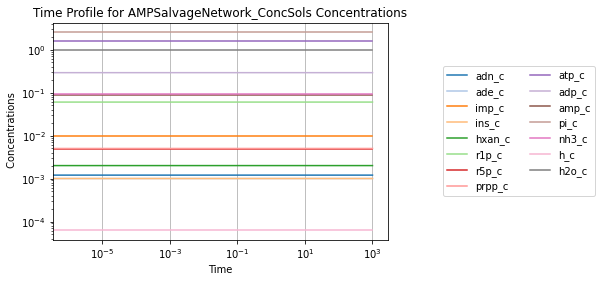

In [13]:
# Setup simulation object
sim = Simulation(ampsn, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(ampsn, time=(0, 1e3, 1e4 + 1))
# Quickly render and display time profiles
conc_sol.view_time_profile()

### Storing information and references
#### Compartment
Because the character "c" represents the cytosol compartment, it is recommended to define and set the compartment in the `MassModel.compartments` attribute.

In [14]:
ampsn.compartments = {"c": "Cytosol"}
print(ampsn.compartments)

{'c': 'Cytosol'}


#### Units
All of the units for the numerical values used in this model are "Millimoles" for amount and "Liters" for volume (giving a concentration unit of 'Millimolar'), and "Hours" for time. In order to ensure that future users understand the numerical values for model, it is important to define the `MassModel.units` attribute.

The `MassModel.units` is a `cobra.DictList` that contains only `UnitDefinition` objects from the `mass.core.unit` submodule. Each `UnitDefinition` is created from `Unit` objects representing the base units that comprise the `UnitDefinition`. These `Units` are stored in the `list_of_units` attribute. Pre-built units can be viewed using the `print_defined_unit_values` function from the `mass.core.unit` submodule. Alternatively, custom units can also be created using the `UnitDefinition.create_unit` method. For more information about units, please see the module docstring for `mass.core.unit` submodule.

__Note:__ It is important to note that this attribute will NOT track units, but instead acts as a reference for the user and others so that they can perform necessary unit conversions.

In [15]:
# Using pre-build units to define UnitDefinitions
concentration = UnitDefinition("mM", name="Millimolar",
                               list_of_units=["millimole", "per_litre"])
time = UnitDefinition("hr", name="hour", list_of_units=["hour"])

# Add units to model
ampsn.add_units([concentration, time])
print(ampsn.units)

[<UnitDefinition Millimolar "mM" at 0x7f8db6470350>, <UnitDefinition hour "hr" at 0x7f8db6470b50>]


## Export

After validation, the model is ready to be saved. The model can either be exported as a ".json" file or as an ".sbml" (".xml") file using their repsective submodules in `mass.io`.

To export the model, only the path to the directory and the model object itself need to be specified.

### Export using SBML

In [16]:
sbml.write_sbml_model(mass_model=ampsn, filename="SB2_" + ampsn.id + ".xml")

### Export using JSON

In [17]:
json.save_json_model(mass_model=ampsn, filename="SB2_" + ampsn.id + ".json")